## Сорокин Вадим, 828

# Лабораторная работа 1.1

Экспериментальная проверка уравнения Эйнштейна для фотоэффекта и определение постоянной Планка

In [1]:
import numpy as np
import scipy as sp
import scipy.optimize
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import splev, splrep
from scipy.interpolate import UnivariateSpline
import scipy.optimize 
from scipy.optimize import fsolve
from IPython.display import Image
import statsmodels.api as sm


### Цель работы:
Исследовать зависимость фототока от величины задерживающего потенциала и частоты падающего излучения, вычислить постоянную Планка.



### Теоретическая справка:
Энергетический баланс:
\begin{equation}
\hbar \omega = E_{max} + W
\end{equation}

Запирающий потенциал:
\begin{equation}
E_{max} = eV_0
\end{equation}

\begin{equation}
eV_0 = \hbar\omega - W
\end{equation}

Наклон графика $V_0(\omega)$:
\begin{equation}
\frac{dV_0}{d\omega} = \frac{\hbar}{e}
\end{equation}



### Оборудование:
Источник света S (лампа накаливания), конденсор, призменный монохроматор УМ-2, фотоэлемент, 2 цифровых вольтметра.



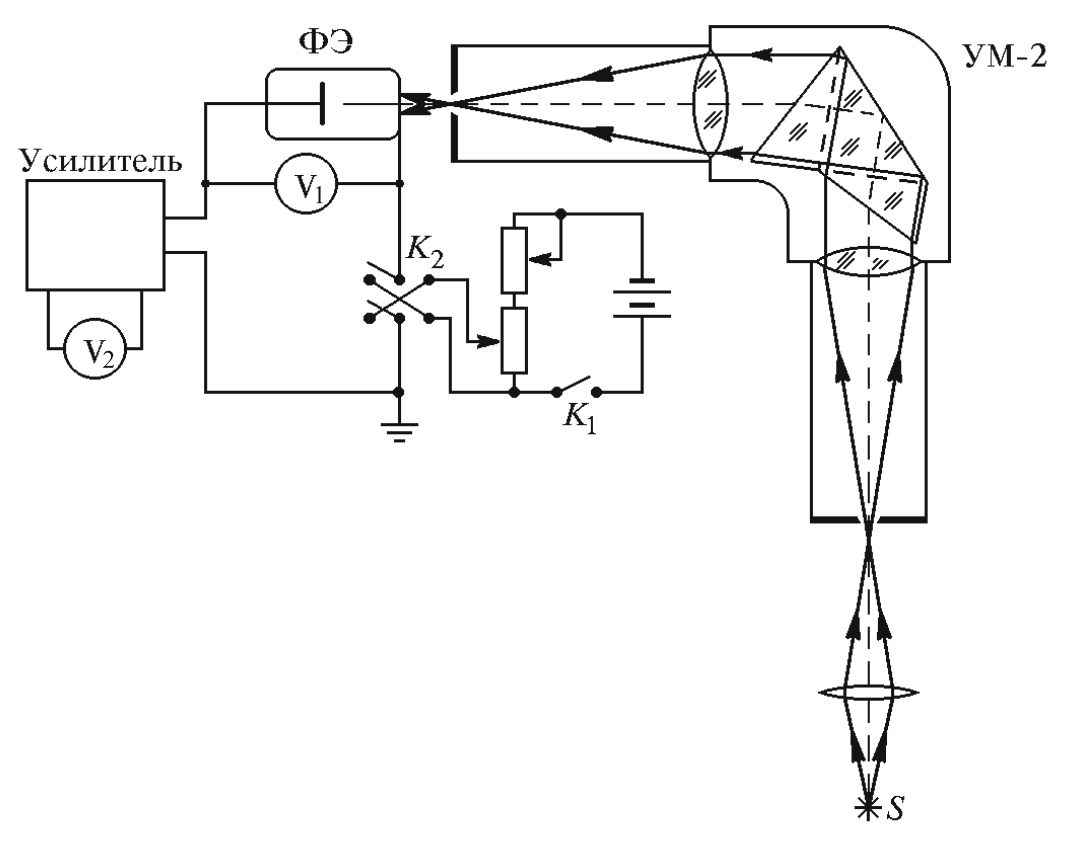

In [2]:
Image(filename='./pic.png', width=400) 


### Ход работы:

### Часть 1: градуировочный график

In [3]:
grad_data = pd.read_csv('./data/grad_data.csv') 

In [4]:
grad_data

,$\phi$,$\lambda Å$
0,1887,5331
1,1948,5401
2,2207,5852
3,2257,5945
4,2276,5976
5,2309,6074
6,2339,6143
7,2448,6402
8,2438,6383
9,2417,6334


In [5]:
k = grad_data['$\phi$'].argsort() 
x, y = grad_data['$\phi$'][k], grad_data['$\lambda Å$'][k]

 
def f(x, a, b, c):
    return a * x**2 + b * x + c

popt, pcov = sp.optimize.curve_fit(f, x, y)
perr = np.sqrt(np.diag(pcov))
sigma_a, sigma_b, sigma_c = perr
a, b, c = popt



Text(0, 1, '$\\lambda, Å$')

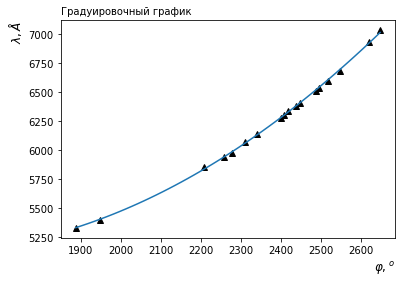

In [6]:
plt.plot(x, y, 'k^')
xs = np.linspace(np.min(x), np.max(x))
plt.plot(xs, f(xs, a, b, c)) 
plt.title('Градуировочный график', loc='left', fontsize=10)
plt.xlabel('$φ, ^o$', fontsize=12, loc='right')
plt.ylabel('$\lambda, Å$', fontsize=12, loc='top')


### Часть 2: зависимость фототока от напряжения:

Определим полезные функции:

In [7]:
wl = lambda x: f(x, a, b, c)

In [8]:
def plotter(x, y, intrsc, wl):
    plt.plot(x, y, 'k^') 
    xs = np.linspace(np.min(x)-0.1, np.max(x))
    plt.plot(xs, spl(xs), 'g--') 
    plt.grid() 
    plt.plot(intrsc, 0, 'gs')

    plt.annotate('x={}'.format(intrsc), xy=(intrsc, 0), xytext = (intrsc+0.1, 0-0.1),  
            arrowprops=dict(facecolor='black', shrink=0.0, width=1, headwidth=8))

    plt.ylabel('$I^{1/2}$', fontsize=12, loc='top')
    plt.xlabel('$V_{фотоэл}; V$', fontsize=12, loc='right')
    plt.title('$λ={}Å$'.format(np.round(wl)))

In [9]:
v0 = np.array([])  # - запирающее напряжение (будем вычислять из экстраполяции)
wl_array = np.array([])  # - длины волн

### $\varphi=1948^o$

In [10]:
wl_array = np.append(wl_array, wl(1948))


In [11]:
data1 = pd.read_csv('./data/data1.csv')

In [12]:
k = data1['$V_{фотоэл}; V$'].argsort() 
x, y = data1['$V_{фотоэл}; V$'][k], np.sqrt(data1['$I$'][k])
spl = UnivariateSpline(x, y)
spl.set_smoothing_factor(0.1)

intrsc = fsolve(spl, [-0.8, -0.7])[0]
v0 = np.append(v0, intrsc)


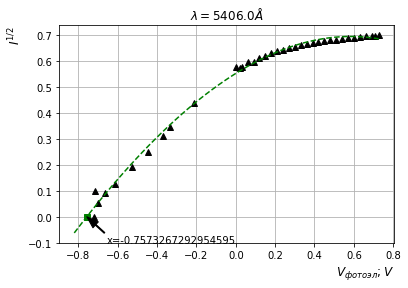

In [13]:
plotter(x, y, intrsc, wl_array[-1])

### $\varphi=2257^o$

In [14]:
wl(2257)
wl_array = np.append(wl_array, wl(2257))


In [15]:
data2 = pd.read_csv('./data/data2.csv')

In [16]:
k = data2['$V_{фотоэл}; V$'].argsort() 
x, y = data2['$V_{фотоэл}; V$'][k], np.sqrt(data2['$I$'][k])
spl = UnivariateSpline(x, y) 
spl.set_smoothing_factor(0.1)

intrsc = fsolve(spl, [-0.6, -0.5])[0]
v0 = np.append(v0, intrsc)


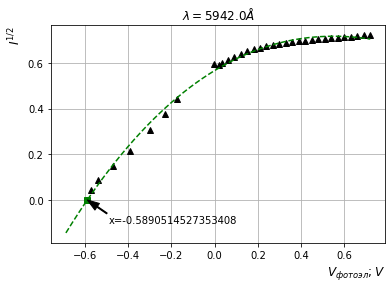

In [17]:
plotter(x, y, intrsc, wl_array[-1]) 

### $\varphi=2309^o$

In [18]:
wl(2309)

wl_array = np.append(wl_array, wl(2309))


In [1050]:
data3 = pd.read_csv('./data/data3.csv') 

In [1051]:
k = data3['$V_{фотоэл}; V$'].argsort() 
x, y = data3['$V_{фотоэл}; V$'][k], np.sqrt(data3['$I$'][k])
spl = UnivariateSpline(x, y) 
spl.set_smoothing_factor(0.1)


intrsc = fsolve(spl, [-0.6, -0.5])[0]
v0 = np.append(v0, intrsc)


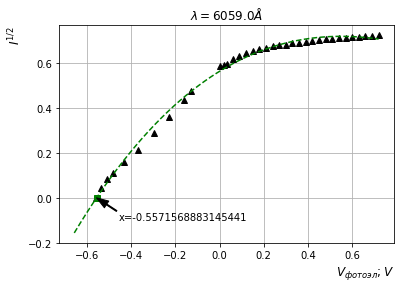

In [1052]:
plotter(x, y, intrsc, wl_array[-1])

### $\varphi=2417^o$

In [1053]:
wl(2417)
wl_array = np.append(wl_array, wl(2417))


In [1054]:
data4 = pd.read_csv('./data/data4.csv') 


In [1055]:
k = data4['$V_{фотоэл}; V$'].argsort() 
x, y = data4['$V_{фотоэл}; V$'][k], np.sqrt(data4['$I$'][k])
spl = UnivariateSpline(x, y) 
spl.set_smoothing_factor(0.1)


intrsc = fsolve(spl, [-0.6, -0.5])[0]
v0 = np.append(v0, intrsc)


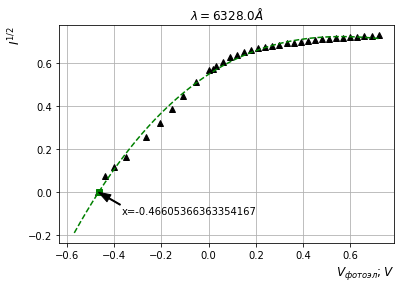

In [1056]:
plotter(x, y, intrsc, wl_array[-1])

### $\varphi=2518^o$

In [1057]:
wl(2518)
wl_array = np.append(wl_array, wl(2518))


In [1058]:
data5 = pd.read_csv('./data/data5.csv') 


In [1059]:
k = data5['$V_{фотоэл}; V$'].argsort() 
x, y = data5['$V_{фотоэл}; V$'][k], np.sqrt(data5['$I$'][k])
spl = UnivariateSpline(x, y) 
spl.set_smoothing_factor(0.1)


intrsc = fsolve(spl, [-0.6, -0.5])[0]
v0 = np.append(v0, intrsc)


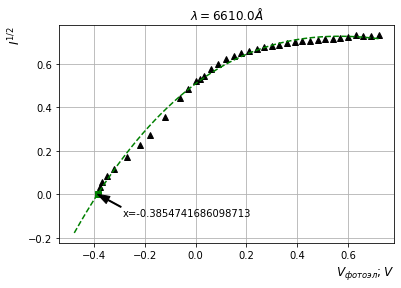

In [1060]:
plotter(x, y, intrsc, wl_array[-1])

### Вычисление погрешностей и $\hbar$: подробно


Общая методика:
\begin{enumerate}
\item Найдем погрешность аппроксимации, для этого вычислим 95% confidence interval (на графике выделен серым цветом)
\item Построим 95% confidence interval  графически и вычислим точки пересечения с осью х
\item Построим кресты ошибок (берем среднее можду отклонениями от $V_0$ в правую и левую сторону)
\item Оценим погрешность параметра k методом $χ^2$ 
\end{enumerate}

\begin{equation}
    y = f(x|k, b) = kx + b
\end{equation}

\begin{equation}
    \chi^2 (k, b) = \sum_i{\Big(\frac{y_i-kx_i-b}{\sigma_i}\Big)}^2 \rightarrow \text{min} 
\end{equation}



In [1110]:
data = [data1, data2, data3, data4, data5]


In [1111]:
def err_plotter(ax, x, y, fittedvalues, iv_l, iv_u):
    ax.plot(x, y, 'k^', label="data")
    ax.plot(x, fittedvalues, 'r--.', label="OLS")
    ax.legend(loc='best')
    ax.grid()
    ax.fill_between(x, iv_l, iv_u, alpha=0.2)
    ax.set_xlim(np.min(x) - 0.2, np.max(x)) 
    
    ax.set_ylabel('$I^{1/2}$', fontsize=12, loc='top')
    ax.set_xlabel('$V_{фотоэл}; V$', fontsize=12, loc='right')


In [1112]:
def receive(x0, y0, spl):
    x = np.append(np.array([np.min(x0) - 0.1]), x0) #np.array([-0.5]).append(x0) #np.linspace(-0.7, 0, nsample)
    y_true = spl(x) 
    y = np.append(np.array([spl(x[0])]), y0)

    res = sm.OLS(y, y_true).fit()
    prstd, iv_l, iv_u = wls_prediction_std(res)
    
    spl_l = UnivariateSpline(x, iv_l) 
    spl_l.set_smoothing_factor(1)
    intrsc_l = fsolve(spl_l, [-1, -0])[0]

    spl_u = UnivariateSpline(x, iv_u) 
    spl_u.set_smoothing_factor(1)
    intrsc_u = fsolve(spl_u, [-1, -0])[0]

    return x, y, res.fittedvalues, prstd, iv_l, iv_u, intrsc_l, intrsc_u
 


Для каждого набора данных вычислим ошибку определения $V_0$:

In [1113]:
spls = []
xs = []
ys = []
fittedvaluess = []
prstds = []
iv_ls = []
iv_us = []
intrsc_ls = []
intrsc_us = []
sigmas = []

for i, each in enumerate(data):
    k = each['$V_{фотоэл}; V$'].argsort() 
    x, y = each['$V_{фотоэл}; V$'][k], np.sqrt(each['$I$'][k])
    
    spl = UnivariateSpline(x, y) 
    spls.append(spl)
    spls[-1].set_smoothing_factor(0.1)
    
    x0, y0 = x[:10], y[:10]
    
    x, y, fittedvalues, prstd, iv_l, iv_u, intrsc_l, intrsc_u = receive(x0, y0, spl) 
    xs.append(x) 
    ys.append(y)
    fittedvaluess.append(fittedvalues)
    prstds.append(prstd)
    iv_ls.append(iv_l) 
    iv_us.append(iv_u) 
    intrsc_us.append(intrsc_u) 
    intrsc_ls.append(intrsc_l)
    
    intrsc = fsolve(spl, [-1, 0])[0]
 
    sigmas.append(np.mean([np.abs(intrsc_u - intrsc), np.abs(intrsc_l - intrsc)]))



Массив ошибок $V_0$:

In [1114]:
sigmas 

[0.05546602072789497,
 0.03571143547724581,
 0.02484967898277962,
 0.03001559795209635,
 0.02528055780337715]

Построим 95% confidence interval:

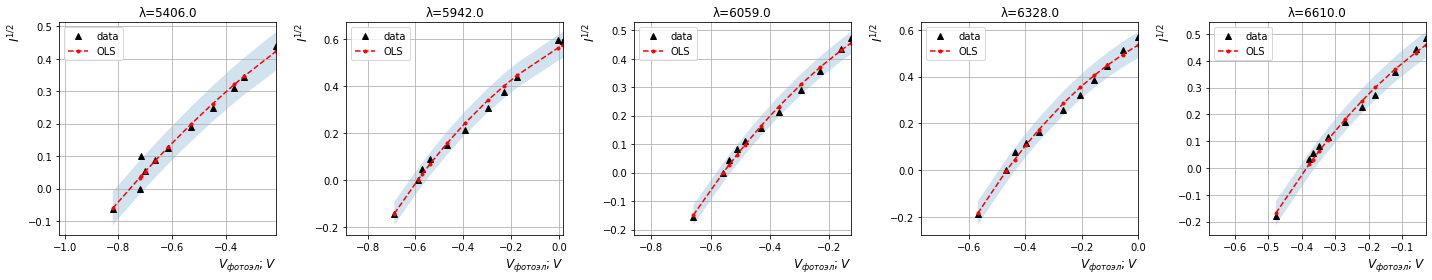

In [1117]:
nfig, axs = plt.subplots(1, 5)
nfig.set_figwidth(20)

for i, ax in enumerate(axs):
    err_plotter(ax, xs[i], ys[i], fittedvaluess[i], iv_ls[i], iv_us[i])
    ax.set_title('λ='+str(np.round(wl_array[i])))

nfig.tight_layout()

Построим график с крестами ошибок и полученной методом $\chi^2$ аппроксимирующей прямой:

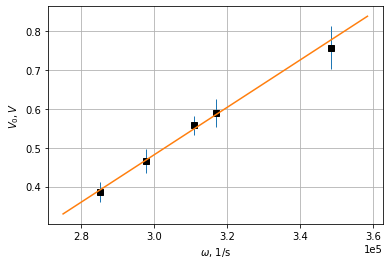

In [1121]:
v0 = np.abs(v0)
freq_array = 2*np.pi*sp.constants.c / wl_array

x, y = freq_array, v0


ax = plt.gca()

yerr = sigmas
plt.errorbar(x, y, yerr=yerr, fmt='none',elinewidth=1) 
plt.plot(x, y, 'ks') 

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

def func(x, k, b):
    return k * x + b

guess = [0, 0]
popt, pcov = sp.optimize.curve_fit(func, x, y, guess, sigmas)
perr = np.sqrt(np.diag(pcov))
sigma_k, sigma_b = perr
k, b = popt  

x0 = np.linspace(np.min(x)-0.1e5, np.max(x)+0.1e5, 100) 
plt.plot(x0, func(x0, k, b))
plt.ylabel('$V_0, V$')
plt.xlabel('$\omega$, 1/s')
plt.grid()

Откуда получаем погрешность k:

In [1101]:
sigma_k

2.637309467478819e-07

И погрешность $h$:

In [1108]:
sigma_k*2*np.pi*sp.constants.e  

2.6549194912418137e-25

Итоговое значение $h$:

In [1106]:
k*2*np.pi*sp.constants.e 

6.141724180284983e-24

\begin{equation}
k = \frac{dV_0}{d\omega} = \frac{\hbar}{e}
\end{equation}

\begin{equation}
h = 2\pi k e = (6.1 \pm 0.3)\cdot 10^{-24} Дж\cdot с
\end{equation}
